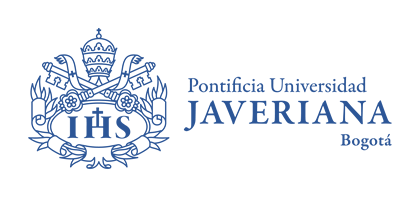

# Análisis de algoritmos - Ejemplo análisis regresión
## Uso de statsmodels para análisis de resultados
Este notebook tiene como objetivo familiarizar al estudiante con el uso del paquete statsmodels de Python para el análisis de resultados experimentales


In [ ]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

# Carga de los archivos

Mediante el uso de la librería pandas, podemos cargar un archivo en formato 'csv' que generamos mediante nuestros experimentos.

In [ ]:
SHORT = "output_16_128_4"
MEDIUM = "output_256_512_16"
LARGE = "output_512_2048_32"

 Con la función plot, podemos revisar el comportamiento del tiempo de ejecución a medida que incrementamos el tamaño de la entrada

In [ ]:
short_results = pd.read_csv(SHORT + ".csv", sep=',', header=None, names=['n','bubble','insertion','quick'])
plot = short_results.plot(y=['bubble','insertion','quick'],x='n', xlabel="n", ylabel="time in nanoseconds")
fig = plot.get_figure()
fig.savefig(SHORT + ".png")

In [ ]:
medium_results = pd.read_csv(MEDIUM + ".csv", sep=',', header=None, names=['n','bubble','insertion','quick'])
plot = medium_results.plot(y=['bubble','insertion','quick'],x='n', xlabel="n", ylabel="time in nanoseconds")
fig = plot.get_figure()
fig.savefig(MEDIUM + ".png")

In [ ]:
large_results = pd.read_csv(LARGE + ".csv", sep=',', header=None, names=['n','bubble','insertion','quick'])
plot = large_results.plot(y=['bubble','insertion','quick'],x='n', xlabel="n", ylabel="time in nanoseconds")
fig = plot.get_figure()
fig.savefig(LARGE + ".png")

# statsmodels API

Statsmodels es un paquete de estadística de Python que nos permite realizar de forma sencilla regresiones y confirmar si nuestra hipótesis teórica sobre el comportamiento de un algoritmo coincide con lo que estamos observando experimentalmente.

La función [`ols`](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html) realiza una regresión de mínimos cuadrados para ver si nuestra variable dependiente (n) se relaciona con la variable independiente (tiempo).

En nuestro DataFrame quedó registrado el tiempo del algoritmo `bubblesort` en la columna `bubble` del algoritmo. Nuestra hipótesis teórica es que este algoritmo es cuadrático, para realizar la confirmación de esta hipótesis vamos a relacionar ambas variables con la siguiente fórmula:

`bubble ~ np.power(n,2)`

Nota: Para ver la sintaxis de cómo se pueden expresar estas fórmulas, puede conocer más en el siguiente link:

https://www.statsmodels.org/devel/example_formulas.html


In [ ]:
# ver https://www.statsmodels.org/devel/example_formulas.html

In [38]:
mod = smf.ols(formula='bubble ~ np.power(n,2)', data=large_results)

In [39]:
res = mod.fit()

In [40]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 bubble   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 3.740e+04
Date:                Sat, 03 Aug 2024   Prob (F-statistic):           7.65e-70
Time:                        10:00:40   Log-Likelihood:                -822.12
No. Observations:                  49   AIC:                             1648.
Df Residuals:                      47   BIC:                             1652.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -4.284e+06   1.27e+06     -3.

Los parámetros nos indican la relación encontrada entre las variables

In [41]:
res.params

Intercept        -4.284354e+06
np.power(n, 2)    1.125842e+02
dtype: float64

El plot_fit nos indica qué tanto ajuste logró la regresión vs los valores reales. Diferencias importantes para n pequeños o n grandes nos indicarían que no se está ajustando de forma correcta a la hipótesis.

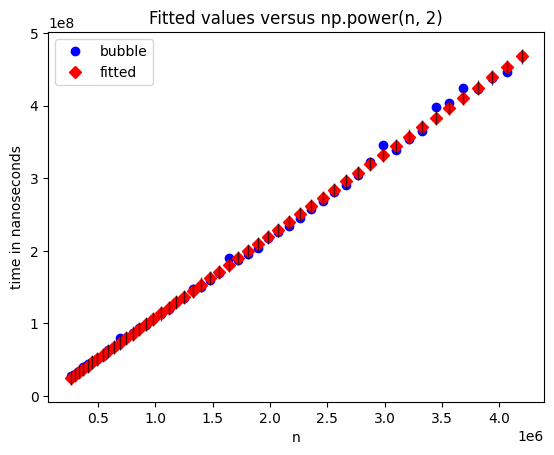

In [42]:
fix_plot = sm.graphics.plot_fit(res,"np.power(n, 2)")
fix_plot.axes[0].set_xlabel("n")
fix_plot.axes[0].set_ylabel("time in nanoseconds")
fix_plot.savefig("bubble_fit.png")

El siguiente código prueba el resultado de la hipótesis de la complejidad teórica del quicksort vs lo obtenido.

In [49]:
mod = smf.ols(formula='quick ~ n:np.log2(n)', data=large_results)

In [50]:
res = mod.fit()

In [51]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  quick   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     2402.
Date:                Sat, 03 Aug 2024   Prob (F-statistic):           5.27e-42
Time:                        10:06:54   Log-Likelihood:                -650.62
No. Observations:                  49   AIC:                             1305.
Df Residuals:                      47   BIC:                             1309.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     8.422e+04   5.58e+04      1.508   

In [52]:
res.params

Intercept       84218.131552
n:np.log2(n)      190.717552
dtype: float64

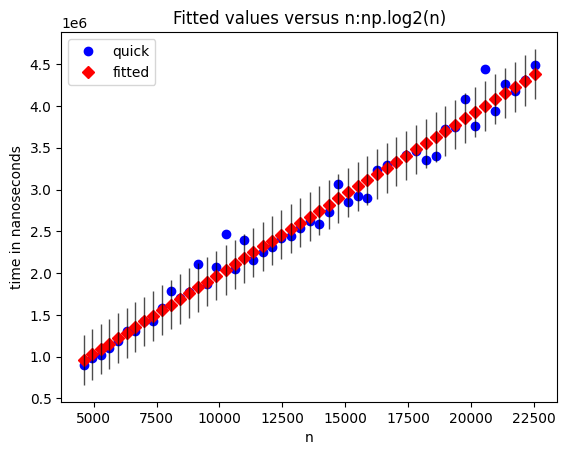

In [53]:
fix_plot = sm.graphics.plot_fit(res, "n:np.log2(n)")
fix_plot.axes[0].set_xlabel("n")
fix_plot.axes[0].set_ylabel("time in nanoseconds")
fix_plot.savefig("quick_fit.png")

In [43]:
mod = smf.ols(formula='insertion ~ np.power(n,2)', data=large_results)

In [44]:
res = mod.fit()

In [45]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              insertion   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.145e+04
Date:                Sat, 03 Aug 2024   Prob (F-statistic):           3.53e-64
Time:                        10:01:22   Log-Likelihood:                -766.88
No. Observations:                  49   AIC:                             1538.
Df Residuals:                      47   BIC:                             1542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -4.501e+05   4.12e+05     -1.

In [46]:
res.params

Intercept        -450059.236183
np.power(n, 2)        27.617308
dtype: float64

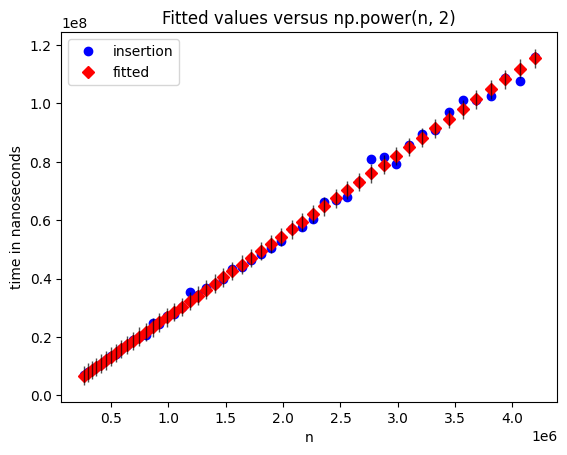

In [47]:
fix_plot = sm.graphics.plot_fit(res, "np.power(n, 2)")
fix_plot.axes[0].set_xlabel("n")
fix_plot.axes[0].set_ylabel("time in nanoseconds")
fix_plot.savefig("insertion_fit.png")